In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hotels_data = pd.read_csv("/kaggle/input/international-hotel-booking-analytics/hotels.csv")
reviews_data = pd.read_csv("/kaggle/input/international-hotel-booking-analytics/reviews.csv")
users_data = pd.read_csv("/kaggle/input/international-hotel-booking-analytics/users.csv")

hotels_data = hotels_data.rename(columns={'country': 'hotel_country'})
users_data = users_data.rename(columns={'country': 'user_country'})

In [5]:
# data cleaning checks
print("num duplicates:", hotels_data.duplicated().sum() + reviews_data.duplicated().sum() + users_data.duplicated().sum())

print("hotel null values:", hotels_data.isnull().sum())
print("reviews null values:", reviews_data.isnull().sum())
print("users null values:", users_data.isnull().sum())

num duplicates: 0
hotel null values: hotel_id                0
hotel_name              0
city                    0
hotel_country           0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64
reviews null values: review_id                0
user_id                  0
hotel_id                 0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
dtype: int64
users null values: user_id           0
user_gender       0
user_country      0
age_group         0
traveller_type    0
join_date         0
dtype: int64


In [6]:
hotels_data = hotels_data.drop(["hotel_name", "star_rating", "lat", "lon"], axis = 1)
users_data = users_data.drop(["join_date"], axis = 1)
reviews_data = reviews_data.drop(["review_date", "review_text"], axis = 1)

In [11]:
# data engineering question (1)
df_one = reviews_data.merge(users_data[["user_id", "traveller_type"]], on = "user_id", how = "left")
df_one = df_one.merge(hotels_data[["hotel_id", "city"]], on = "hotel_id", how = "left")

df_one.info()

city_traveler_scores = df_one.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index()

city_traveler_scores = city_traveler_scores.sort_values(
    by=['traveller_type', 'score_overall'], 
    ascending=[True, False]
)

best_city_per_traveler = city_traveler_scores.groupby('traveller_type').first().reset_index()

best_city_per_traveler.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   score_overall          50000 non-null  float64
 4   score_cleanliness      50000 non-null  float64
 5   score_comfort          50000 non-null  float64
 6   score_facilities       50000 non-null  float64
 7   score_location         50000 non-null  float64
 8   score_staff            50000 non-null  float64
 9   score_value_for_money  50000 non-null  float64
 10  traveller_type         50000 non-null  object 
 11  city                   50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB


,traveller_type,city,score_overall
0,Business,Dubai,8.965668
1,Couple,Amsterdam,9.096989
2,Family,Dubai,9.214381
3,Solo,Amsterdam,9.108454


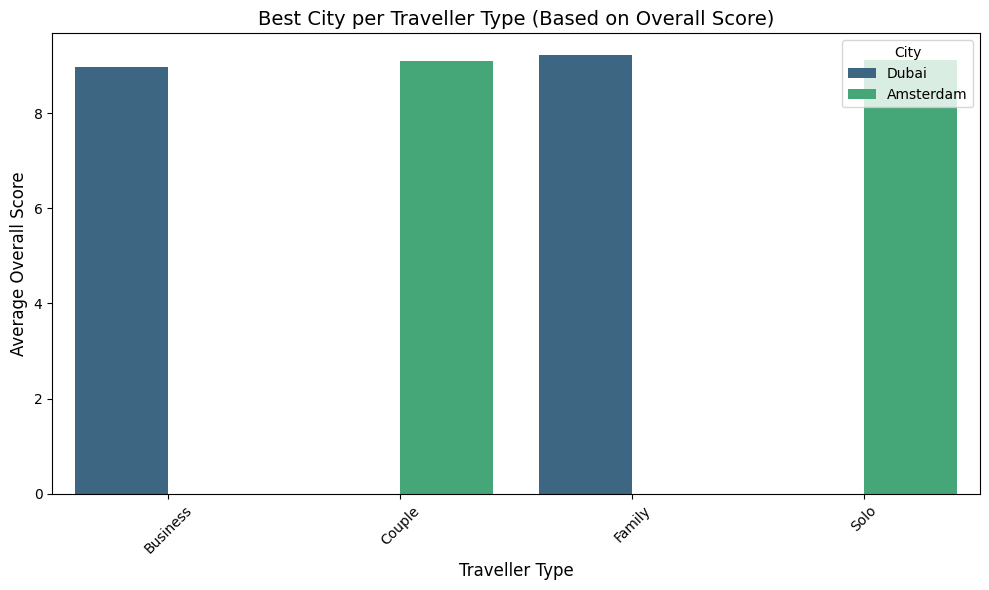

In [8]:
# question (1) visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=best_city_per_traveler,
    x='traveller_type',
    y='score_overall',
    hue='city',
    palette='viridis'
)

plt.title('Best City per Traveller Type (Based on Overall Score)', fontsize=14)
plt.xlabel('Traveller Type', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# data engineerign question (2)
df_two = reviews_data.merge(users_data[["user_id", "age_group"]], on = "user_id", how = "left")
df_two = df_two.merge(hotels_data[["hotel_id", "hotel_country"]], on = "hotel_id", how = "left")

df_two.info()

country_age_vfm = df_two.groupby(
    ['age_group', 'hotel_country']
)['score_value_for_money'].mean().reset_index()

top_3_per_age = country_age_vfm.groupby('age_group').head(3)

print(top_3_per_age)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   score_overall          50000 non-null  float64
 4   score_cleanliness      50000 non-null  float64
 5   score_comfort          50000 non-null  float64
 6   score_facilities       50000 non-null  float64
 7   score_location         50000 non-null  float64
 8   score_staff            50000 non-null  float64
 9   score_value_for_money  50000 non-null  float64
 10  age_group              50000 non-null  object 
 11  hotel_country          50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB
    age_group hotel_country  score_value_for_money
0       18-24     Argentina               8.557732

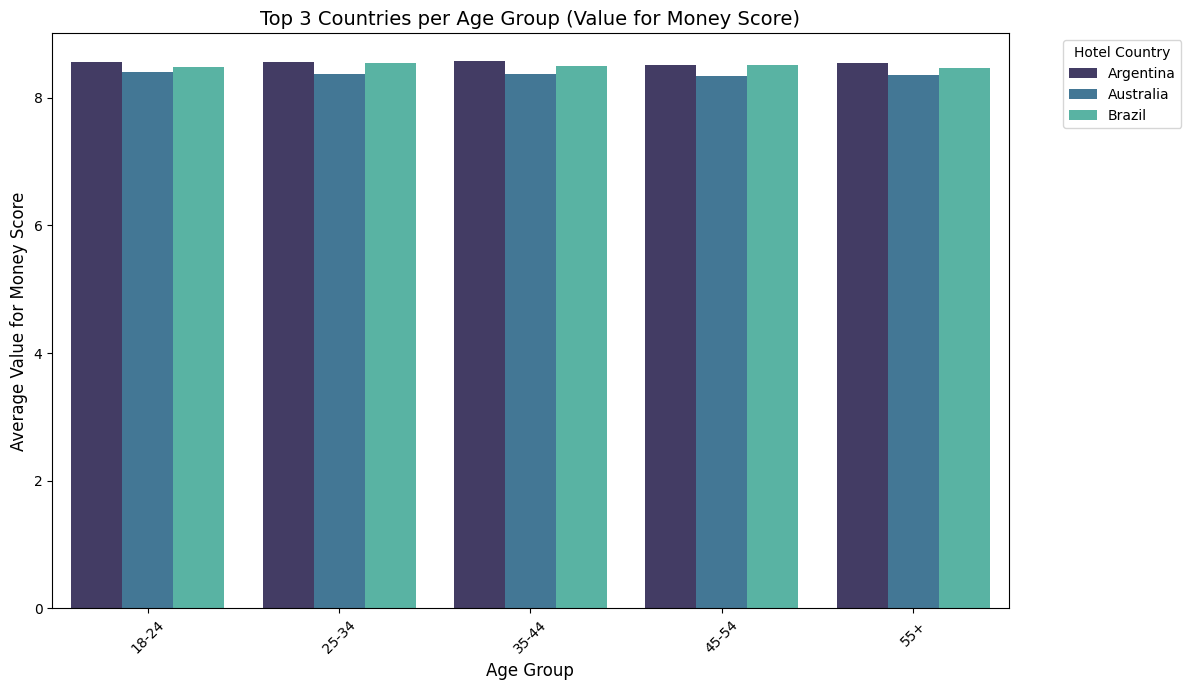

In [10]:
# question (2) visualization
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_3_per_age,
    x='age_group',
    y='score_value_for_money',
    hue='hotel_country',
    palette='mako'
)

plt.title('Top 3 Countries per Age Group (Value for Money Score)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Value for Money Score', fontsize=12)
plt.legend(title='Hotel Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()